# 2. Introduction
http://docs.sympy.org/latest/tutorial/intro.html

Symbolic computation deals with the computation of mathematical objects symbolically. This means that the ***mathematical objects are represented exactly, not approximately***, and mathematical expressions with unevaluated variables are left in symbolic form.

Let’s take an example. Say we wanted to use the built-in Python functions to compute square roots. We might do something like this

In [1]:
import math
math.sqrt(9)

3.0

9 is a perfect square, so we got the exact answer, 3. But suppose we computed the square root of a number that isn’t a perfect square

In [2]:
math.sqrt(8)

2.8284271247461903

Here we got an approximate result. 2.82842712475 is not the exact square root of 8 (indeed, the actual square root of 8 cannot be represented by a finite decimal, since it is an irrational number). If all we cared about was the decimal form of the square root of 8, we would be done.

But suppose we want to go further. Recall that 8‾√=4⋅2‾‾‾‾√=22‾√8=4⋅2=22. We would have a hard time deducing this from the above result. This is where symbolic computation comes in. With a symbolic computation system like SymPy, square roots of numbers that are not perfect squares are left ***unevaluated*** by default

In [3]:
import sympy
sympy.sqrt(3)

sqrt(3)

Furthermore—and this is where we start to see the real power of symbolic computation—symbolic results can be symbolically ***simplified***.

In [4]:
sympy.sqrt(8)

2*sqrt(2)

## A More Interesting Example
The above example starts to show how we can manipulate irrational numbers exactly using SymPy. But it is much more powerful than that. Symbolic computation systems (which by the way, are also often called ***computer algebra systems***, or just ***CAS***s) such as SymPy are capable of computing symbolic expressions with variables.

As we will see later, in SymPy, variables are defined using ***symbols***. Unlike many symbolic manipulation systems, variables in SymPy must be defined before they are used (the reason for this will be discussed in the next section).

Let us define a symbolic expression, representing the mathematical expression $x + 2y$.

In [5]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

Note that we wrote x + 2*y just as we would if x and y were ordinary Python variables. But in this case, instead of evaluating to something, the expression remains as just x + 2*y. Now let us play around with it:

In [6]:
expr + 1

x + 2*y + 1

In [7]:
expr - x

2*y

Notice something in the above example. When we typed expr - x, we did not get x + 2*y - x, but rather just 2*y. The x and the -x automatically canceled one another. This is similar to how sqrt(8) automatically turned into 2*sqrt(2) above. This isn’t always the case in SymPy, however:

In [8]:
x * expr

x*(x + 2*y)

Here, we might have expected x(x+2y) to transform into $x^2+2xy$, but instead we see that the expression was left alone. This is a common theme in SymPy. Aside from obvious simplifications like x−x=0 and $\sqrt{8} =
2\sqrt{2}$, ***most simplifications are not performed automatically***. This is because we might prefer the factored form x(x+2y), or we might prefer the expanded form $x^2+2xy$. Both forms are useful in different circumstances. In SymPy, there are functions to go from one form to the other

In [9]:
from sympy import expand, factor
expanded_expr = expand(x*(x + 2*y))
expanded_expr

x**2 + 2*x*y

In [10]:
factor(expanded_expr)

x*(x + 2*y)

## The Power of Symbolic Computation
***The real power of a symbolic computation system such as SymPy is the ability to do all sorts of computations symbolically***. SymPy can simplify expressions, compute derivatives, integrals, and limits, solve equations, work with matrices, and much, much more, and do it all ***symbolically***. It includes modules for plotting, printing (like 2D pretty printed output of math formulas, or $\LaTeX$), code generation, physics, statistics, combinatorics, number theory, geometry, logic, and more. Here is a small sampling of the sort of symbolic power SymPy is capable of, to whet your appetite.

In [11]:
from sympy import *
x, t, z, nu = symbols('x t z nu')
x, t, z, nu

(x, t, z, nu)

In [12]:
x, t, z, nu = symbols('x, t, z, nu')
x, t, z, nu

(x, t, z, nu)

In [13]:
var('m n o p')
m, n, o, p

(m, n, o, p)

This will make all further examples pretty print with unicode characters.

In [14]:
init_printing(use_unicode = True)

Take the derivative of $sin⁡(x)e^x$

In [15]:
diff(sin(x) * exp(x), x)

Compute $\int(e^x\sin{(x)} + e^x\cos{(x)})\,dx$   

In [16]:
exp(x) * sin(x) + exp(x) * cos(x)

In [17]:
simplify(exp(x) * sin(x) + exp(x) * cos(x))

In [18]:
integrate(exp(x) * sin(x) + exp(x) * cos(x), x)

Compute $\int_{-\infty}^{\infty} \sin({x^2}) \, dx$

In [19]:
expr = integrate(sin(x**2), (x, -oo, oo))
expr

Find $\lim_{x\to 0}\frac{\sin{(x)}}{x}$

In [20]:
limit(sin(x) / x, x, 0)

Solve $x^2 - 2 = 0$

In [21]:
solve(x**2 - 2, x)

Solve the differential equation  
$y'' - y = e^t$

In [22]:
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

Find the eigenvalues of $\left[\begin{smallmatrix} 1 & 2\\ 2 & 2 \end{smallmatrix}\right]$

In [23]:
m = Matrix([[1, 2], [2, 2]])
m

⎡1  2⎤
⎢    ⎥
⎣2  2⎦

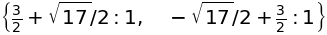

In [24]:
m.eigenvals()

In [25]:
m.eigenvects()

⎡⎛3   √17     ⎡⎡   -2    ⎤⎤⎞  ⎛  √17   3     ⎡⎡   -2    ⎤⎤⎞⎤
⎢⎜─ + ───, 1, ⎢⎢─────────⎥⎥⎟, ⎜- ─── + ─, 1, ⎢⎢─────────⎥⎥⎟⎥
⎢⎜2    2      ⎢⎢  √17   1⎥⎥⎟  ⎜   2    2     ⎢⎢  1   √17⎥⎥⎟⎥
⎢⎜            ⎢⎢- ─── - ─⎥⎥⎟  ⎜              ⎢⎢- ─ + ───⎥⎥⎟⎥
⎢⎜            ⎢⎢   2    2⎥⎥⎟  ⎜              ⎢⎢  2    2 ⎥⎥⎟⎥
⎢⎜            ⎢⎢         ⎥⎥⎟  ⎜              ⎢⎢         ⎥⎥⎟⎥
⎣⎝            ⎣⎣    1    ⎦⎦⎠  ⎝              ⎣⎣    1    ⎦⎦⎠⎦

Rewrite the Bessel function $J_v(Z)$ in terms of the spherical Bessel function $j_v(Z)$.

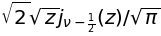

In [26]:
besselj(nu, z).rewrite(jn)

Print $\int_0^\pi \cos^2 (x) \, dx$ using $\LaTeX$

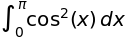

In [27]:
expr = Integral(cos(x)**2, (x, 0, pi))
expr

In [28]:
latex(expr)

'\\int_{0}^{\\pi} \\cos^{2}{\\left (x \\right )}\\, dx'

In [29]:
expr = integrate(cos(x)**2, (x, 0, pi))
expr

In [30]:
latex(expr)

'\\frac{\\pi}{2}'

## Why SymPy?

- SymPy is completely free. It is open source, and licensed under the liberal BSD license.
- SymPy uses Python. 
- SymPy on the other hand aims to be an independent system, with all the features implemented in SymPy itself.
- SymPy can be used as a library.